In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# input/lapchart/year(2012,2013...)

path = './input/lapchart/'  #ディレクトリ一覧を取得したいディレクトリ

df = pd.DataFrame()

for year in os.listdir(path):  
    dir_path = path + year
    if not(os.path.isdir(dir_path)):
        continue
#    print('year=',year,",path=",dir_path)
    dir_path = dir_path + "/"
    for course in os.listdir(dir_path):
        file_path = dir_path + course
        if not(os.path.isfile(file_path)):
            continue
        course = course.replace('.txt','')
#        print('course=',course,',file_path=',file_path)
        
        f = open(file_path, 'r')
        line = f.readline()
        pre_chart = []
        lap = 0
        point = 0
        
        while line:
            line = f.readline()
            now_chart = line.strip().split(' ')
            del now_chart[0]
            # 末尾に空行が入っているので除外
            if len(now_chart) == 0:
                continue
            if len(pre_chart) > 3:
                if pre_chart[0] != now_chart[0]:
                    point = point + 2
                if pre_chart[1] != now_chart[1]:
                    point = point + 1
                if pre_chart[2] != now_chart[2]:
                    point = point + 1
                
            pre_chart = now_chart.copy()
            lap = lap + 1
        f.close()
        
        key_value = {}
        key_value['year'] = year
        key_value['course'] = course
        key_value['point'] = point
        key_value['lap'] = lap
        key_value['pointPerLap'] = point / lap

        series = pd.Series(list(key_value.values()), index=key_value.keys())
        df = df.append(series, ignore_index = True)


df


,course,lap,point,pointPerLap,year
0,マレーシア,20.0,5.0,0.250000,2013
1,バレンシア,30.0,14.0,0.466667,2013
2,日本,24.0,2.0,0.083333,2013
3,カタルーニャ,25.0,0.0,0.000000,2013
4,ドイツ,30.0,11.0,0.366667,2013
5,イタリア,22.0,4.0,0.181818,2013
6,サンマリノ,28.0,4.0,0.142857,2013
7,オランダ,26.0,8.0,0.307692,2013
8,アラゴン,23.0,9.0,0.391304,2013
9,イギリス,20.0,7.0,0.350000,2013


In [20]:
temp = df.sort_values('pointPerLap',ascending=False)
temp.head()

,course,lap,point,pointPerLap,year
97,オランダ,26.0,48.0,1.846154,2018
88,オーストラリア,27.0,47.0,1.740741,2017
26,アラゴン,23.0,29.0,1.260870,2014
105,オーストラリア,27.0,30.0,1.111111,2018
51,カタール,22.0,23.0,1.045455,2015


In [21]:
grouped = df.groupby('course')
grouped.describe()

lap                                                     point  \
          count       mean       std   min   25%   50%    75%   max count   
course                                                                      
アメリカズ       6.0  20.833333  0.408248  20.0  21.0  21.0  21.00  21.0   6.0   
アラゴン        7.0  23.000000  0.000000  23.0  23.0  23.0  23.00  23.0   7.0   
アルゼンチン      5.0  23.800000  2.167948  20.0  24.0  25.0  25.00  25.0   5.0   
イギリス        6.0  19.833333  0.408248  19.0  20.0  20.0  20.00  20.0   6.0   
イタリア        7.0  22.857143  0.377964  22.0  23.0  23.0  23.00  23.0   7.0   
インディアナポリス   4.0  27.250000  0.500000  27.0  27.0  27.0  27.25  28.0   4.0   
オランダ        7.0  26.000000  0.000000  26.0  26.0  26.0  26.00  26.0   7.0   
オーストラリア     7.0  25.857143  3.023716  19.0  27.0  27.0  27.00  27.0   7.0   
オーストリア      3.0  28.000000  0.000000  28.0  28.0  28.0  28.00  28.0   3.0   
カタルーニャ      7.0  24.857143  0.377964  24.0  25.0  25.0  25.00  25.0   7.0   
カタール        7.0  21.714286  0.755929  20.0  22.0  22.0  22.00  22.0   7.0   
サンマリノ       7.0  27.714286  0.487950  27.0  27.5  28.0  28.00  28.0   7.0   
スペイン        7.0  26.714286  0.755929  25.0  27.0  27.0  27.00  27.0   7.0   
タイ          1.0  26.000000       NaN  26.0  26.0  26.0  26.00  26.0   1.0   
チェコ         7.0  21.857143  0.377964  21.0  22.0  22.0  22.00  22.0   7.0   
ドイツ         7.0  30.000000  0.000000  30.0  30.0  30.0  30.00  30.0   7.0   
バレンシア       7.0  29.571429  1.133893  27.0  30.0  30.0  30.00  30.0   7.0   
フランス        7.0  27.857143  0.377964  27.0  28.0  28.0  28.00  28.0   7.0   
ポルトガル       1.0  28.000000       NaN  28.0  28.0  28.0  28.00  28.0   1.0   
マレーシア       7.0  18.857143  2.609506  13.0  19.5  20.0  20.00  20.0   7.0   
ラグナセカ       2.0  32.000000  0.000000  32.0  32.0  32.0  32.00  32.0   2.0   
日本          7.0  24.000000  0.000000  24.0  24.0  24.0  24.00  24.0   7.0   

                        ...                pointPerLap                      \
                mean    ...      75%   max       count      mean       std   
course                  ...                                                  
アメリカズ       3.833333    ...      4.5   7.0         6.0  0.183333  0.086439   
アラゴン       13.000000    ...     15.5  29.0         7.0  0.565217  0.373171   
アルゼンチン     14.200000    ...     14.0  23.0         5.0  0.601667  0.233071   
イギリス       10.500000    ...     12.0  15.0         6.0  0.531579  0.162980   
イタリア        8.714286    ...     11.0  20.0         7.0  0.380011  0.255835   
インディアナポリス   7.250000    ...      8.0   8.0         4.0  0.265873  0.033007   
オランダ       18.285714    ...     24.5  48.0         7.0  0.703297  0.594482   
オーストラリア    20.857143    ...     27.0  47.0         7.0  0.805904  0.523141   
オーストリア     14.333333    ...     15.5  18.0         3.0  0.511905  0.114805   
カタルーニャ      8.857143    ...     13.0  14.0         7.0  0.355476  0.209944   
カタール       15.142857    ...     18.5  23.0         7.0  0.700649  0.271847   
サンマリノ      10.000000    ...     10.0  29.0         7.0  0.359221  0.323882   
スペイン        4.857143    ...      6.0  13.0         7.0  0.185397  0.174193   
タイ         12.000000    ...     12.0  12.0         1.0  0.461538       NaN   
チェコ        10.857143    ...     15.5  19.0         7.0  0.497526  0.312635   
ドイツ        12.857143    ...     11.0  31.0         7.0  0.428571  0.268348   
バレンシア      11.714286    ...     15.0  20.0         7.0  0.396296  0.218142   
フランス       11.428571    ...     14.0  22.0         7.0  0.410620  0.221806   
ポルトガル       0.000000    ...      0.0   0.0         1.0  0.000000       NaN   
マレーシア       7.428571    ...      9.0  12.0         7.0  0.387478  0.140636   
ラグナセカ       5.000000    ...      5.0   5.0         2.0  0.156250  0.000000   
日本          8.571429    ...      9.5  20.0         7.0  0.357143  0.237971   

                                                             
                min       25%       50%       75%       max  
course     

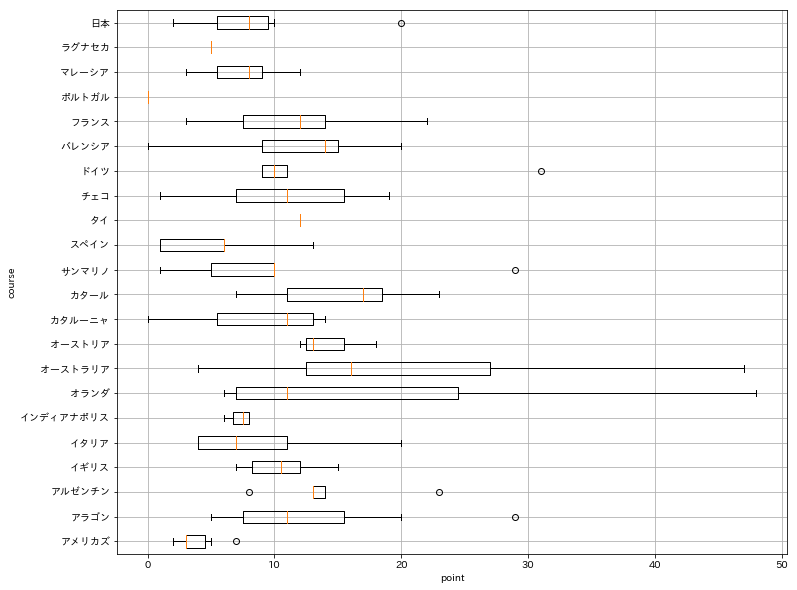

In [22]:
Y = []
target_label = 'point'
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1][target_label])
    
fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('course')
plt.grid(True)
plt.show()

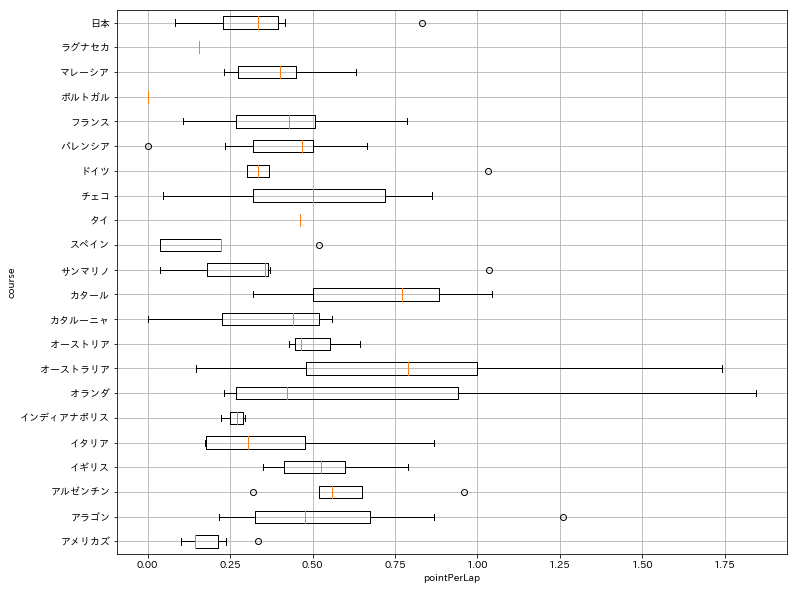

In [23]:
Y = []
target_label = 'pointPerLap'
labels = []
for group in grouped:
    labels.append(group[0])
    Y.append(group[1][target_label])
    
fig,ax = plt.subplots(figsize=(12,10))
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel(target_label)
plt.ylabel('course')
plt.grid(True)
plt.show()

In [24]:
grouped.get_group('日本')

,course,lap,point,pointPerLap,year
2,日本,24.0,2.0,0.083333,2013
20,日本,24.0,6.0,0.250000,2014
38,日本,24.0,8.0,0.333333,2015
56,日本,24.0,5.0,0.208333,2012
74,日本,24.0,20.0,0.833333,2017
92,日本,24.0,10.0,0.416667,2018
110,日本,24.0,9.0,0.375000,2016


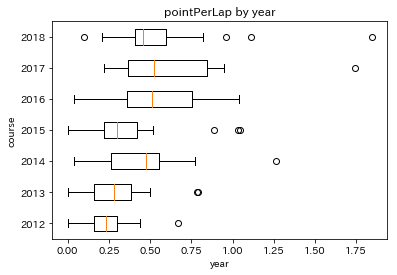

In [25]:
year_grouped = df.groupby('year')
Y = []
labels = []
for group in year_grouped:
    labels.append(group[0])
    Y.append(group[1]['pointPerLap'])
    
fig,ax = plt.subplots()
ax.boxplot(Y,labels=labels,vert=False)
plt.xlabel('year')
plt.ylabel('course')
plt.title('pointPerLap by year')
plt.show()

In [26]:
test_grouped = df.groupby('year').sum().reset_index()
test_grouped.sort_values('point', ascending=False)

,year,lap,point,pointPerLap
5,2017,447.0,275.0,11.143913
6,2018,444.0,260.0,10.443574
4,2016,442.0,235.0,9.654491
2,2014,448.0,201.0,8.277196
3,2015,448.0,163.0,6.611089
1,2013,446.0,140.0,5.714297
0,2012,455.0,115.0,4.556147
